<a href="https://colab.research.google.com/github/Anshigupta/decision-tree-algorithm/blob/main/decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

sns.set()
%matplotlib inline

In [ ]:
#load the dataset
df = pd.read_csv("winequality_red.csv")
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [ ]:
df.info()  #information about data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
df.describe()    #describing the data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
df.columns   #column names

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [ ]:
df.values    # Values 

array([[ 7.4  ,  0.7  ,  0.   , ...,  0.56 ,  9.4  ,  5.   ],
       [ 7.8  ,  0.88 ,  0.   , ...,  0.68 ,  9.8  ,  5.   ],
       [ 7.8  ,  0.76 ,  0.04 , ...,  0.65 ,  9.8  ,  5.   ],
       ...,
       [ 6.3  ,  0.51 ,  0.13 , ...,  0.75 , 11.   ,  6.   ],
       [ 5.9  ,  0.645,  0.12 , ...,  0.71 , 10.2  ,  5.   ],
       [ 6.   ,  0.31 ,  0.47 , ...,  0.66 , 11.   ,  6.   ]])

In [ ]:
df.isna().sum()    # finding the null values

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
x=df.drop(columns='quality')
y=df.quality

In [ ]:
from sklearn.model_selection import train_test_split              # splitting the dataset
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=355)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

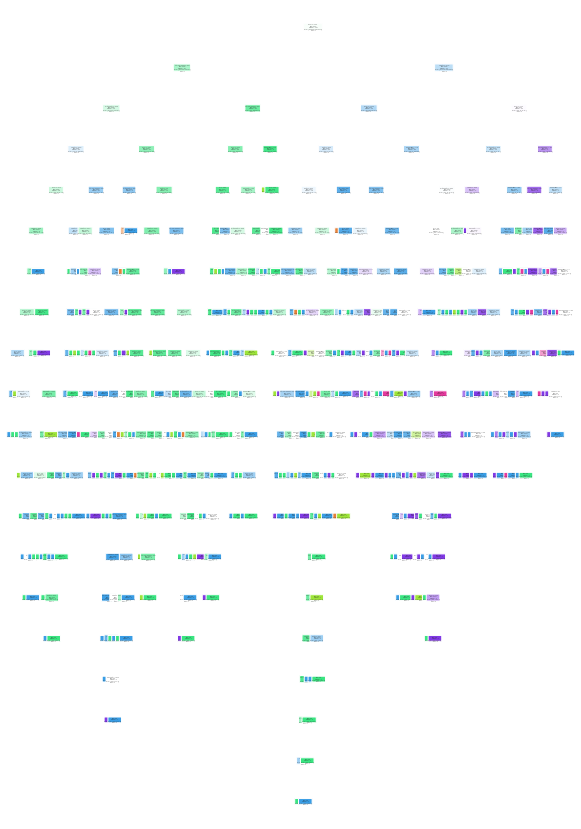

In [ ]:
# Plotting the Decision tree 
from sklearn import tree

fn = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide',
      'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']

cn = ['5', '6', '7', '4', '3', '8']

fig=plt.figure(figsize=(10,15))
t = tree.plot_tree(clf, feature_names = fn, class_names = cn, filled = True, rounded = True)

fig.savefig('Decision Tree')

In [ ]:
print(tree.export_text(clf))

|--- feature_10 <= 10.35
|   |--- feature_6 <= 58.50
|   |   |--- feature_1 <= 0.57
|   |   |   |--- feature_9 <= 0.64
|   |   |   |   |--- feature_10 <= 9.75
|   |   |   |   |   |--- feature_4 <= 0.14
|   |   |   |   |   |   |--- feature_4 <= 0.08
|   |   |   |   |   |   |   |--- feature_10 <= 9.08
|   |   |   |   |   |   |   |   |--- feature_8 <= 3.33
|   |   |   |   |   |   |   |   |   |--- feature_2 <= 0.55
|   |   |   |   |   |   |   |   |   |   |--- class: 6
|   |   |   |   |   |   |   |   |   |--- feature_2 >  0.55
|   |   |   |   |   |   |   |   |   |   |--- class: 5
|   |   |   |   |   |   |   |   |--- feature_8 >  3.33
|   |   |   |   |   |   |   |   |   |--- class: 4
|   |   |   |   |   |   |   |--- feature_10 >  9.08
|   |   |   |   |   |   |   |   |--- feature_1 <= 0.41
|   |   |   |   |   |   |   |   |   |--- feature_0 <= 6.45
|   |   |   |   |   |   |   |   |   |   |--- class: 5
|   |   |   |   |   |   |   |   |   |--- feature_0 >  6.45
|   |   |   |   |   |   |   |   | 

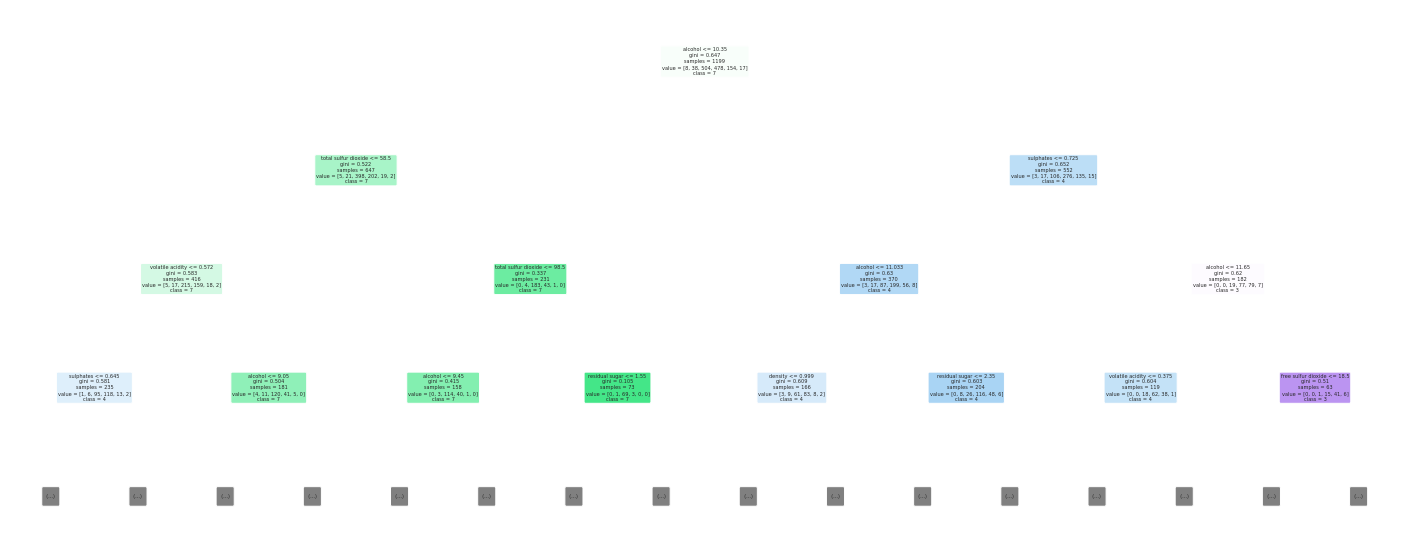

In [ ]:
# visualizing tree

from sklearn import tree

fn = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide',
      'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']

cn = ['5', '6', '7', '4', '3', '8']

fig = plt.figure(figsize = (25, 10))
t = tree.plot_tree(clf, feature_names = fn, class_names = cn, filled = True, rounded = True,max_depth=3)

fig.savefig('Decision Tree 2')

In [ ]:
y_pred = clf.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score  #accuracy of the model
accuracy_score(y_test,y_pred)

0.61

In [ ]:
from sklearn.preprocessing import StandardScaler

# Scaling the dataset
scaler = StandardScaler()
scaler.fit_transform(x_train,y_train)

array([[-1.11620334, -0.76681191,  0.29030817, ...,  0.32364382,
        -0.24461969,  1.69346488],
       [-0.29751116,  0.02356632, -1.21003447, ...,  0.12251272,
        -0.59841826, -0.40668635],
       [-0.29751116,  0.53166661, -1.15829852, ..., -0.14566209,
        -0.18565327, -1.07491628],
       ...,
       [ 0.22879096,  1.43495602,  1.22155532, ..., -2.0899294 ,
         2.99853384, -1.1703777 ],
       [ 0.93052712,  0.08002191,  0.9111396 , ...,  0.52477492,
        -0.24461969, -0.97945486],
       [ 0.28726897,  0.36229985, -0.48573113, ..., -1.15131759,
        -0.71635112, -0.97945486]])

In [ ]:
# hyper-parameters

grid_param={
    'criterion':['gini','entropy'],
    'splitter':['best','random'],
    'max_depth': range(2,30,1),
    'min_samples_split': range(2,8,1),
    'min_samples_leaf':range(2,10,1),

}

In [ ]:
# tuning the hyper-parameters

from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(estimator=clf,param_grid=grid_param,
                           cv=5,n_jobs=-1)
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                     

In [ ]:
# best parameters
best_parameters = grid_search.best_params_
best_parameters

{'criterion': 'gini',
 'max_depth': 7,
 'min_samples_leaf': 4,
 'min_samples_split': 4,
 'splitter': 'best'}

In [63]:
clf = DecisionTreeClassifier(criterion= 'gini',
 max_depth= 7,
 min_samples_leaf= 4,
 min_samples_split= 4,
 splitter= 'best')
clf.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [64]:
y_pred = clf.predict(x_test)
y_pred

array([5, 5, 5, 5, 6, 5, 5, 6, 5, 5, 6, 6, 5, 5, 6, 7, 6, 6, 7, 6, 5, 5,
       5, 7, 5, 7, 5, 5, 6, 6, 6, 6, 6, 7, 6, 6, 5, 6, 6, 7, 6, 6, 5, 5,
       6, 6, 6, 6, 6, 5, 7, 5, 5, 6, 5, 5, 5, 5, 5, 6, 5, 5, 5, 5, 5, 7,
       7, 6, 6, 5, 6, 5, 5, 5, 5, 5, 5, 6, 5, 4, 6, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 7, 5, 5, 5, 5, 6, 5, 5, 5, 5, 5, 5, 7, 5, 5, 6, 6, 7, 5, 5,
       6, 5, 5, 5, 7, 7, 5, 7, 5, 6, 5, 5, 6, 5, 7, 7, 6, 5, 6, 5, 6, 7,
       6, 5, 6, 6, 6, 5, 6, 7, 5, 7, 6, 6, 7, 7, 5, 5, 6, 6, 5, 7, 6, 5,
       6, 5, 5, 6, 6, 5, 6, 6, 5, 6, 5, 6, 7, 6, 5, 7, 7, 5, 7, 7, 6, 5,
       6, 6, 6, 6, 5, 5, 6, 6, 6, 6, 5, 6, 5, 6, 6, 5, 7, 5, 6, 5, 5, 6,
       6, 5, 6, 5, 6, 5, 6, 5, 5, 6, 5, 5, 6, 5, 6, 5, 5, 6, 6, 6, 5, 7,
       6, 6, 5, 5, 5, 6, 6, 5, 5, 6, 5, 5, 5, 5, 6, 7, 5, 6, 6, 5, 5, 5,
       5, 5, 5, 7, 5, 6, 5, 5, 6, 5, 5, 5, 5, 5, 5, 5, 7, 5, 5, 6, 5, 5,
       5, 5, 5, 6, 7, 6, 5, 5, 5, 5, 5, 5, 6, 5, 5, 5, 6, 6, 5, 6, 6, 6,
       5, 6, 6, 7, 5, 5, 5, 5, 5, 5, 5, 7, 6, 5, 7,

In [66]:
from sklearn.metrics import accuracy_score


accuracy_score(y_test,y_pred)

0.5575